In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/ML_Task"

In [3]:
%cd /content/gdrive/My Drive/ML_Task

/content/gdrive/My Drive/ML_Task


In [4]:
import os
import time
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')
# For array manipulation
import numpy as np
import pandas as pd
import pandas.util.testing as tm
# For visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import cv2
import imageio as io
from pylab import *
from sklearn.manifold import TSNE
#For model performance
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.externals import joblib
#For model training
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
import imageio as io

In [5]:
X_encoded = np.load('X_encoded_compressed.npy')
X_encoded.shape

(5533, 100352)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
values = pca.fit_transform(X_encoded)

In [7]:
def plot_(x,y1,y2,row,col,ind,title,xlabel,ylabel,label,isimage=False,color='b'):
    plt.subplot(row,col,ind)
    if isimage:
        plt.imshow(x)
        plt.title(title)
        plt.axis('off')
    else:
        plt.plot(y1,label=label,color='g'); plt.scatter(x,y1,color='g')
        if y2!='': plt.plot(y2,color=color,label='validation'); plt.scatter(x,y2,color=color)
        plt.grid()
        plt.legend()
        plt.title(title); plt.xlabel(xlabel); plt.ylabel(ylabel)

In [8]:
tmp1 = pd.read_csv('training_data.csv')
tmp2 = pd.read_csv('testing_data.csv')
lisp = pd.concat([tmp1, tmp2], ignore_index = True)
lisp.reset_index()
print(len(lisp))

5533


In [9]:
lisp

,Unnamed: 0,Unnamed: 0.1,product_name,product_id,parent_category,Image_Front,frame_shape
0,836,836,Todaywear Junlu Prince DU Y-76 C01-Black-Black...,18273,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
1,4509,4510,Black Pink Line Pink Full Rim Rectangle Vincen...,93035,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
2,3844,3845,Vincent Chase VC 2147 Black Green Sunglasses,50484,sunglasses,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Oval
3,5047,5048,Maroon Full Rim Rectangle Vincent Chase Online...,95820,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
4,239,239,Popular Front 7012 Black-Purple C529 Eyeglasses,13625,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
...,...,...,...,...,...,...,...
5528,4859,4860,Todaywear TOI Special: Dark Maroon Full Rim Wa...,94491,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Wayfarer
5529,2404,2404,Vintage Clever Medium Dark Brown Green Unisex ...,22453,sunglasses,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Oval
5530,2688,2689,Ray-Ban RB3412 Metal Green Gradient 4 Unisex S...,27928,sunglasses,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Aviator
5531,1257,1257,Senorita 1866 Purple Eyeglasses,22615,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle


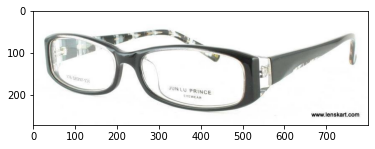

In [10]:
label = lisp.loc[0, 'Image_Front']
img = io.imread(label)
plt.imshow(img)

if Number of clusters: 7


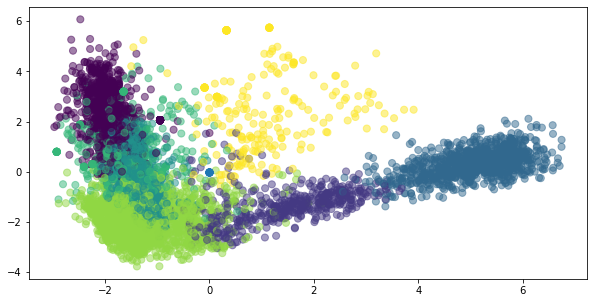

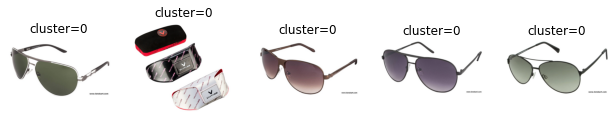

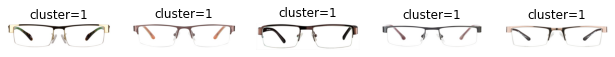

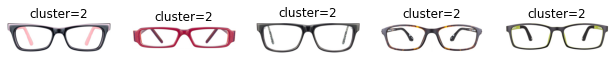

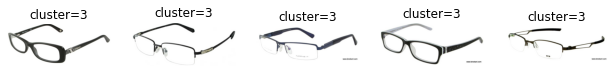

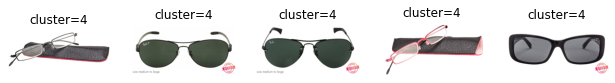

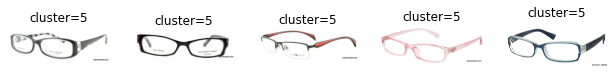

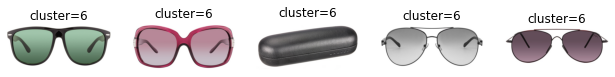


if Number of clusters: 8


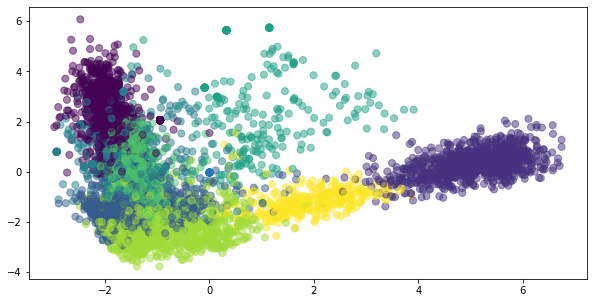

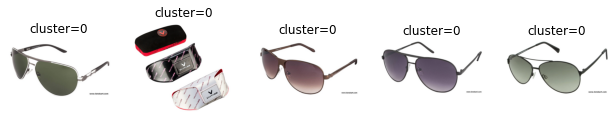

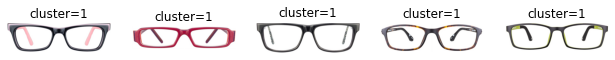

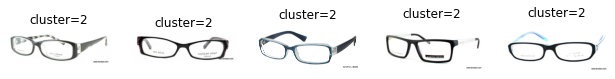

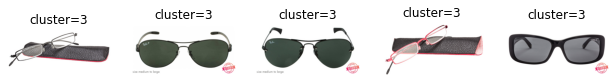

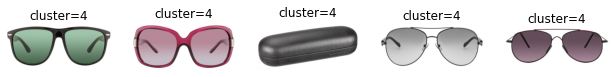

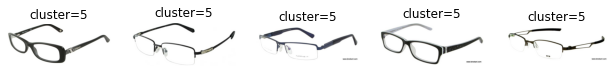

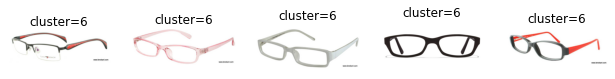

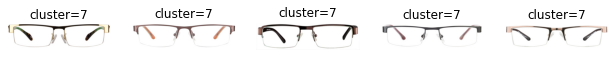


if Number of clusters: 9


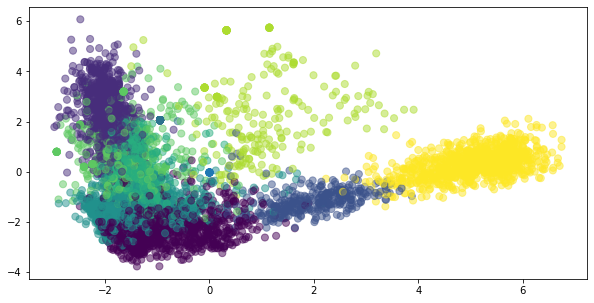

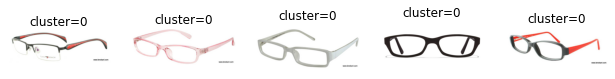

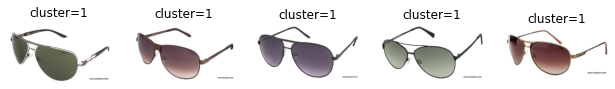

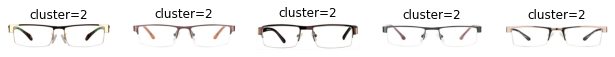

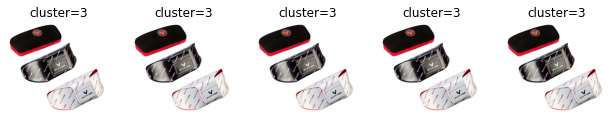

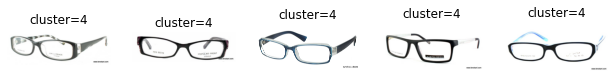

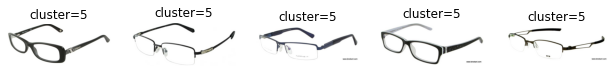

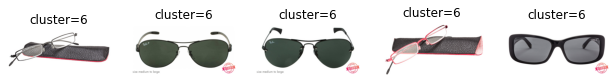

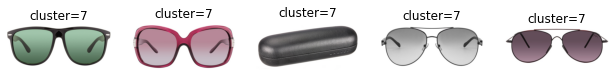

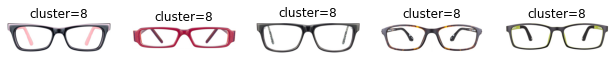


if Number of clusters: 10


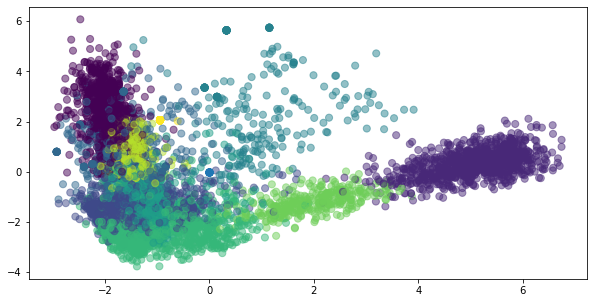

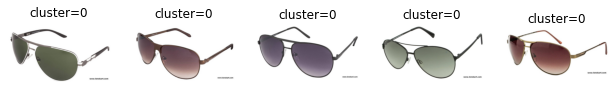

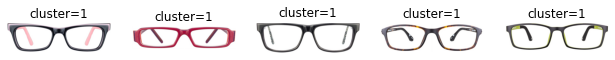

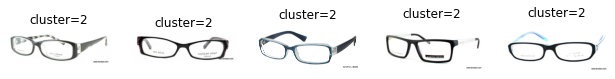

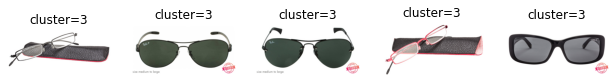

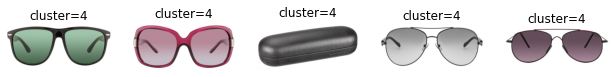

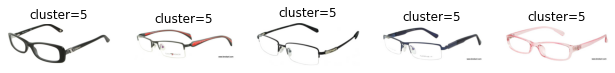

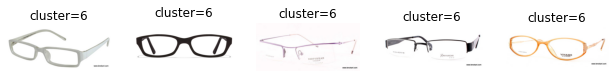

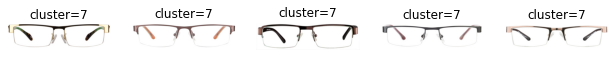

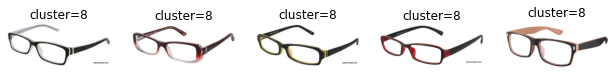

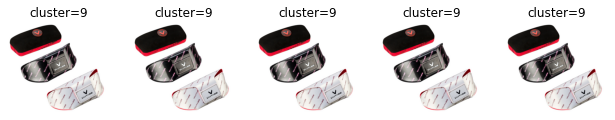

In [ ]:
K = [7,8,9,10]
for k in K:
    print("if Number of clusters: "+str(k))
    kmeans = KMeans(n_clusters = k, random_state=0).fit(X_encoded)
    labels=kmeans.labels_
    centroids = kmeans.cluster_centers_
    plt.figure(figsize=(10,5)) 
    plt.subplot(1,1,1)
    plt.scatter(values[:,0], values[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c=None, s=50)
    plt.show()
    for row in range(k): 
        iter=0
        plt.figure(figsize=(13,3))
        for i,iterator in enumerate(labels):
            if iterator == row:
                img = io.imread(lisp.loc[i, 'Image_Front'])
                plot_(img,"","",1,6,iter+1,"cluster="+str(row),"","","",True)
                iter+=1
            if iter>=5: break
        plt.show()
    print()

In [13]:
#Training the model with optimial K value (6 in our case)
kmeans = KMeans(n_clusters = 10, random_state=0).fit(X_encoded)
labels=kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
kmeans_file = '/content/drive/My Drive/ML_Task/kmeans_model.pkl'
joblib.dump(kmeans,kmeans_file)

['kmeans_model.pkl']

In [16]:
clusters_features = []
cluster_files=[]
for i in [0,1,2,3,4,5,6,7,8,9]:
    i_cluster = []
    i_labels=[]
    for iter,j in enumerate(kmeans.labels_):
        if j==i:
            i_cluster.append(X_encoded[iter])
            i_labels.append(lisp.loc[iter, 'Image_Front'])
    i_cluster = np.array(i_cluster)
    clusters_features.append(i_cluster)
    cluster_files.append(i_labels)

In [21]:
labels=[]
data=[]
files=[]
for iter,i in enumerate(clusters_features):
    data.extend(i)
    labels.extend([iter for i in range(i.shape[0])])
    files.extend(cluster_files[iter])
print(np.array(labels).shape)
print(np.array(data).shape)
print(np.array(files).shape)

(3805,)
(3805, 100352)
(3805,)


In [25]:
knn = KNeighborsClassifier(n_neighbors=10,algorithm='ball_tree',n_jobs=-1)
knn.fit(np.array(data),np.array(labels))

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')

In [26]:
knn_file = 'knn_model.pkl'
joblib.dump(knn,knn_file)

['knn_model.pkl']